<a href="https://colab.research.google.com/github/Imran0897/Placement-Assignment_Md_Imran/blob/main/Python_07_Placement_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
#loading data from url
response = requests.get("https://data.nasa.gov/resource/y77d-th95.json")
data = response.json()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

In [3]:
# checking columns name
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'geolocation', ':@computed_region_cbhk_fwbd',
       ':@computed_region_nnqa_25f4'],
      dtype='object')

In [4]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


In [5]:
# deleting the unwanted columns
df.drop(columns=[':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4'],inplace = True)

In [6]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50...."
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56..."
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216..."
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88..."
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33...."


In [7]:
# create new cloumn with geolocation point
df['geolocation_point']=df['geolocation'].apply(lambda x: x['coordinates'] if isinstance(x, dict) else 0 )

In [8]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,geolocation_point
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....","[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...","[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...","[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...","[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....","[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934-01-01T00:00:00.000,13.633330,79.416670,"{'type': 'Point', 'coordinates': [79.41667, 13...","[79.41667, 13.63333]"
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011-01-01T00:00:00.000,29.481950,-7.611230,"{'type': 'Point', 'coordinates': [-7.61123, 29...","[-7.61123, 29.48195]"
997,Tjabe,24011,Valid,H6,20000,Fell,1869-01-01T00:00:00.000,-7.083330,111.533330,"{'type': 'Point', 'coordinates': [111.53333, -...","[111.53333, -7.08333]"
998,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01T00:00:00.000,-6.666670,106.583330,"{'type': 'Point', 'coordinates': [106.58333, -...","[106.58333, -6.66667]"


In [9]:
# cheking num values
df.isnull().sum()

name                  0
id                    0
nametype              0
recclass              0
mass                 28
fall                  0
year                  1
reclat               12
reclong              12
geolocation          12
geolocation_point     0
dtype: int64

In [10]:
# drop null values
df.dropna(inplace = True)

In [11]:
import datetime
from datetime import datetime

In [12]:
df['Date_time'] = df['year'].apply(lambda x:datetime.strptime(str(x),"%Y-%m-%dT%H:%M:%S.%f"))

In [13]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,geolocation_point,Date_time
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....","[6.08333, 50.775]",1880-01-01 00:00:00
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...","[10.23333, 56.18333]",1951-01-01 00:00:00
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...","[-113, 54.21667]",1952-01-01 00:00:00
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...","[-99.9, 16.88333]",1976-01-01 00:00:00
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....","[-64.95, -33.16667]",1902-01-01 00:00:00


In [14]:
df['only_year'] = df['Date_time'].apply(lambda x : x.year)

Get all the Earth meteorites that fell before the year 2000

In [19]:
# meteroities fell before 2000
df_new = df[(df['only_year']<2000)][['name','only_year']]

In [20]:
df_new

,name,only_year
0,Aachen,1880
1,Aarhus,1951
2,Abee,1952
3,Acapulco,1976
4,Achiras,1902
...,...,...
994,Timochin,1807
995,Tirupati,1934
997,Tjabe,1869
998,Tjerebon,1922


<Figure size 1000x600 with 0 Axes>

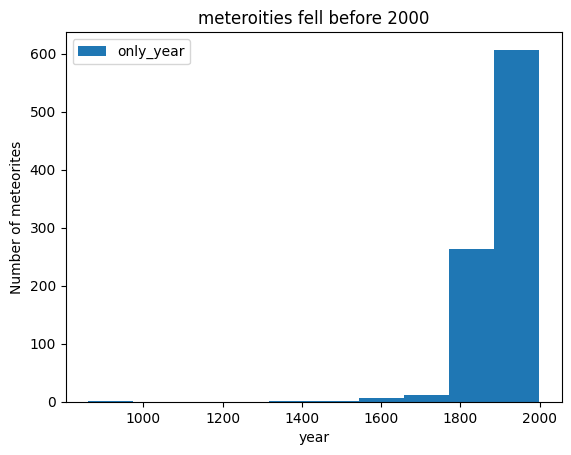

In [24]:
plt.figure(figsize=(10, 6))
df_new.plot(kind='hist')
plt.xlabel("year")
plt.ylabel("Number of meteorites")
plt.title("meteroities fell before 2000")
plt.show()

Get all the earth meteorites co-ordinates who fell before the year 1970

In [ ]:
df2 = pd.concat([df[(df['only_year']<1970)]['name'],df[(df['only_year']<1970)]['only_year'],df[(df['only_year']<1970)]['geolocation_point']],axis = 1)

In [22]:
df2 = df[(df['only_year']<1970)][['name','only_year','geolocation_point']]

In [23]:
df2

,name,only_year,geolocation_point
0,Aachen,1880,"[6.08333, 50.775]"
1,Aarhus,1951,"[10.23333, 56.18333]"
2,Abee,1952,"[-113, 54.21667]"
4,Achiras,1902,"[-64.95, -33.16667]"
5,Adhi Kot,1919,"[71.8, 32.1]"
...,...,...,...
994,Timochin,1807,"[35.2, 54.5]"
995,Tirupati,1934,"[79.41667, 13.63333]"
997,Tjabe,1869,"[111.53333, -7.08333]"
998,Tjerebon,1922,"[106.58333, -6.66667]"


<Figure size 1000x600 with 0 Axes>

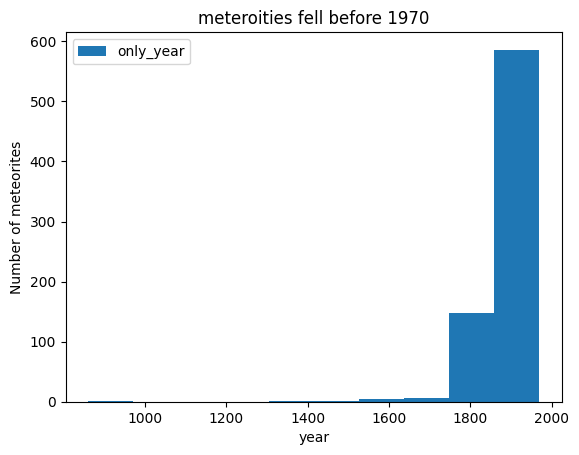

In [25]:
plt.figure(figsize=(10, 6))
df2.plot(kind='hist')
plt.xlabel("year")
plt.ylabel("Number of meteorites")
plt.title("meteroities fell before 1970")
plt.show()

Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [29]:
df.dtypes

name                 object
id                   object
nametype             object
recclass             object
mass                 object
fall                 object
year                 object
reclat               object
reclong              object
geolocation          object
geolocation_point    object
Date_time            object
only_year             int64
dtype: object

In [30]:
df['mass']=df['mass'].astype(str).astype(float)

In [33]:
df3 = df[(df['mass']>10000)][['name','mass']]

In [34]:
df3

,name,mass
2,Abee,107000.0
7,Agen,30000.0
11,Aïr,24000.0
16,Akyumak,50000.0
27,Alfianello,228000.0
...,...,...
991,Tieschitz,28000.0
992,Tilden,74800.0
994,Timochin,65500.0
997,Tjabe,20000.0


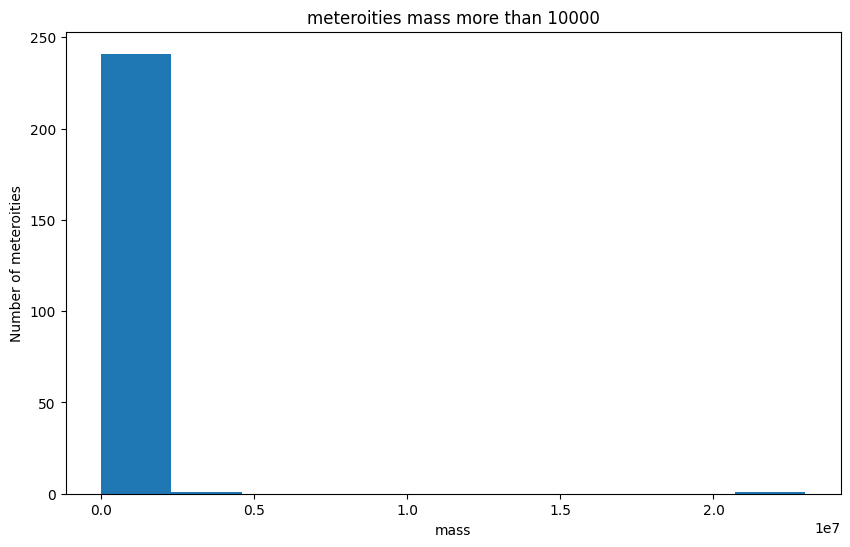

In [37]:
plt.figure(figsize=(10, 6))
df3['mass'].plot(kind='hist')
plt.xlabel("mass")
plt.ylabel("Number of meteroities")
plt.title("meteroities mass more than 10000")
plt.show()